<a href="https://colab.research.google.com/github/namuwasae/pytorchtraining/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

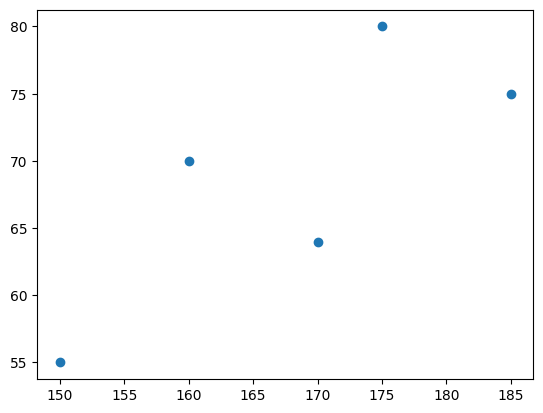

In [58]:
import torch
import matplotlib.pyplot as plt

x = torch.tensor([150,160,170,175,185.]) # 키
y = torch.tensor([55,70,64,80,75.])         # 몸무게
N = len(x)
plt.plot(x,y,'o')

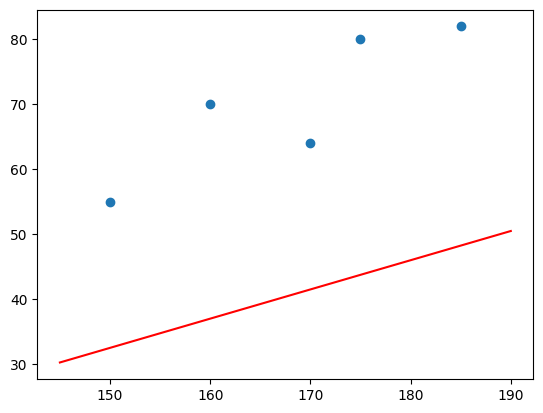

In [ ]:
# 초깃값 설정
w = 0.45
b = -35

x_plot=torch.linspace(145,190,100)
y_plot=w*x_plot+b

plt.plot(x,y,'o')
plt.plot(x_plot,y_plot,'r')

(0.0, 1000.0)

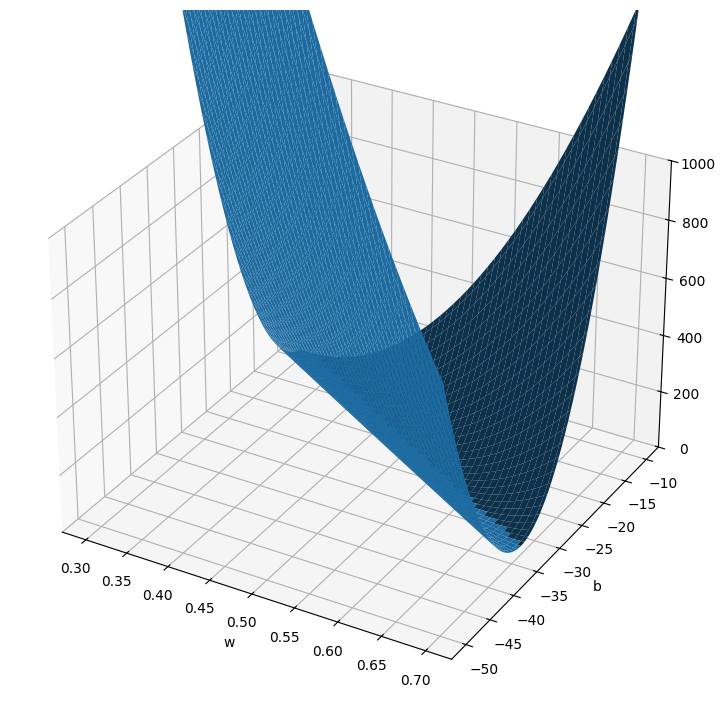

In [ ]:
# w, b를 바꿔가면서 Loss값을 일일히 구해서 가장 작아지게 하는 w, b값을 선정할 것임.
w = 0.5+torch.linspace(-0.2,0.2,100)
b = -30+torch.linspace(-20,20,100)

# Loss함수 구현
L = torch.zeros(len(b),len(w))
for i in range(len(b)):
  for j in range(len(w)):
    for n in range(N): # 모든 키 N
      L[i,j] = L[i,j]+(y[n]-w[j]*x[n]-b[i])**2
L = L/N # MSE(MeanSquaredError)
plt.figure(figsize=[10,9])
ax = plt.axes(projection="3d")
W, B = torch.meshgrid(w,b)
ax.plot_surface(W,B,L)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlim([0,1000])

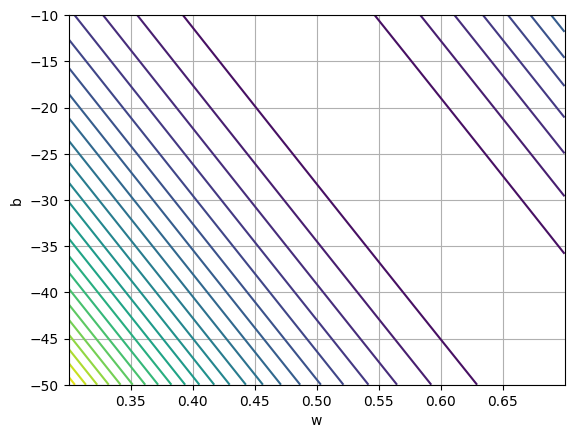

In [ ]:
plt.figure()
plt.contour(w,b,L,30)
plt.xlabel('w');
plt.ylabel('b');
plt.grid()

In [ ]:
print(torch.min(L))

tensor(23.5709)


In [ ]:
w_opt = W[L==torch.min(L)]
b_opt = B[L==torch.min(L)]
print(f"optimal w = {w_opt}")
print(f"optimal b = {b_opt}")

optimal w = tensor([0.5424])
optimal b = tensor([-23.7374])


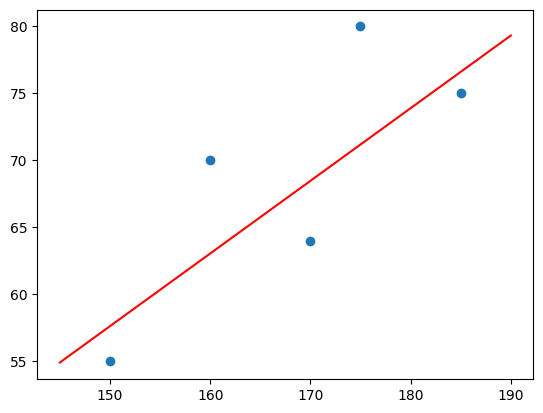

In [ ]:
x_plot = torch.linspace(145,190,100)
y_plot = w_opt*x_plot+b_opt

plt.plot(x,y,'o')
plt.plot(x_plot,y_plot,'r')

epoch = 1, train_loss : 826.2250


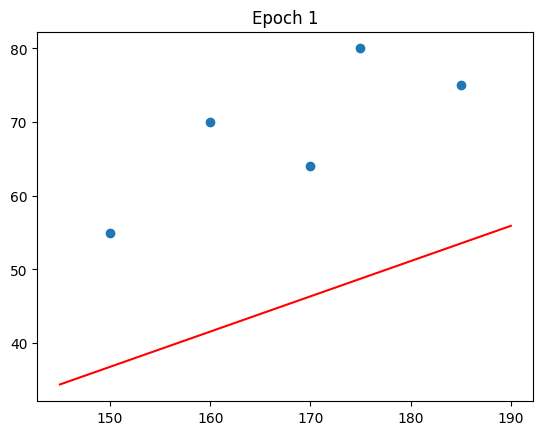

epoch = 2, train_loss : 578.0414


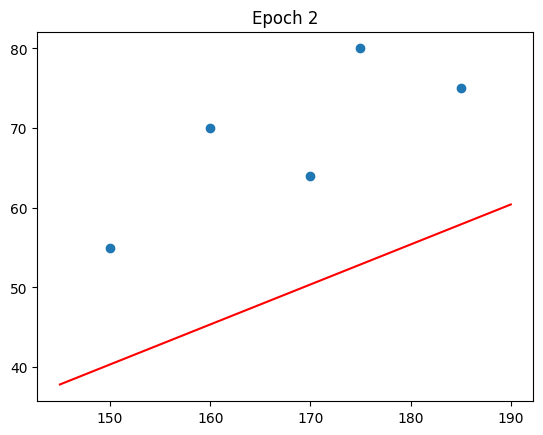

epoch = 3, train_loss : 407.1602


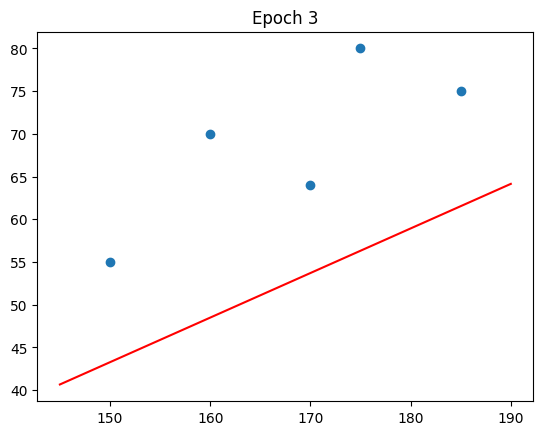

epoch = 4, train_loss : 289.5042


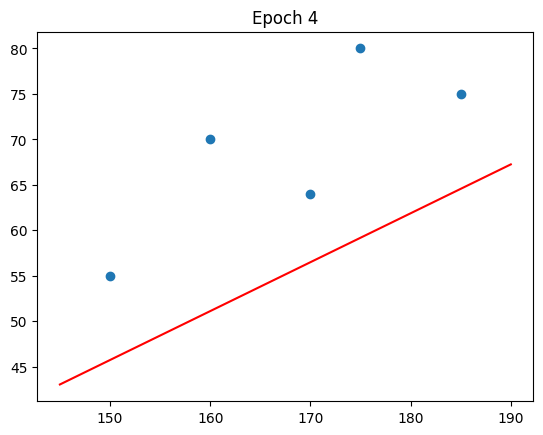

epoch = 5, train_loss : 208.4954


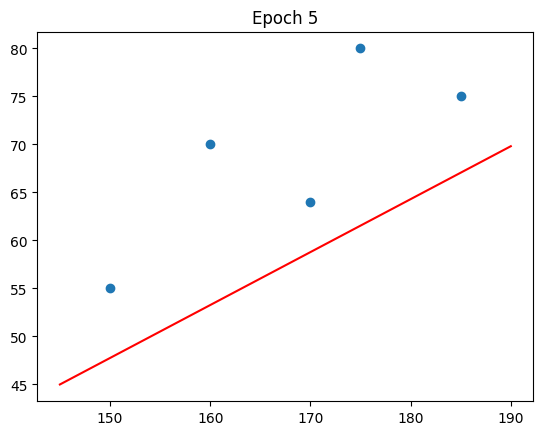

epoch = 6, train_loss : 152.7187


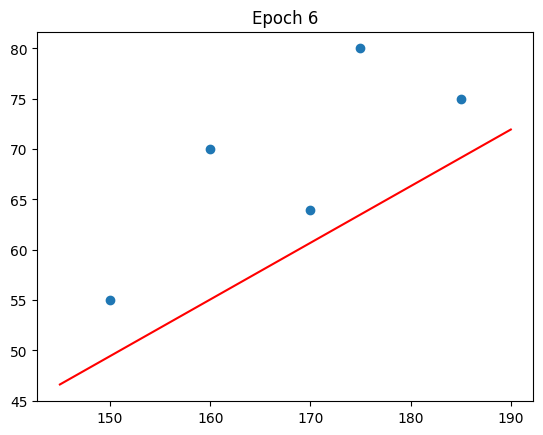

epoch = 7, train_loss : 114.3153


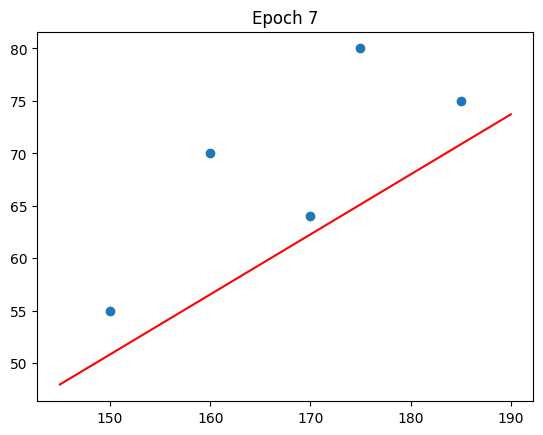

epoch = 8, train_loss : 87.8735


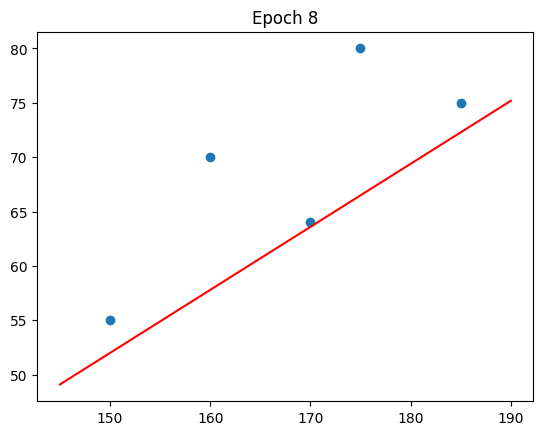

epoch = 9, train_loss : 69.6676


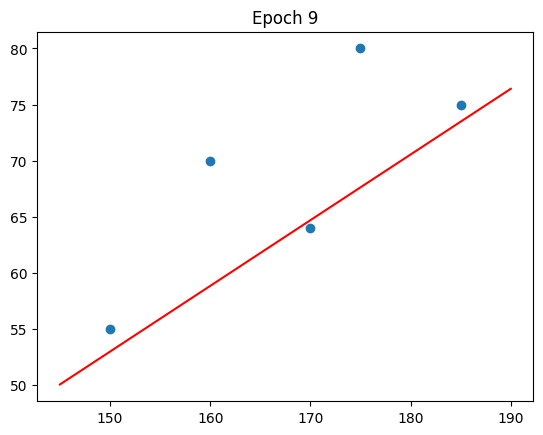

epoch = 10, train_loss : 57.1324


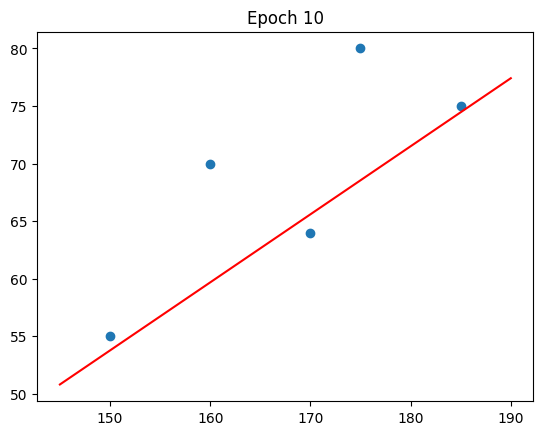

epoch = 11, train_loss : 48.5017


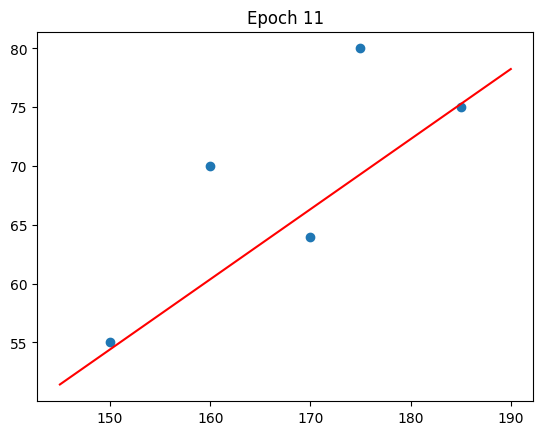

epoch = 12, train_loss : 42.5591


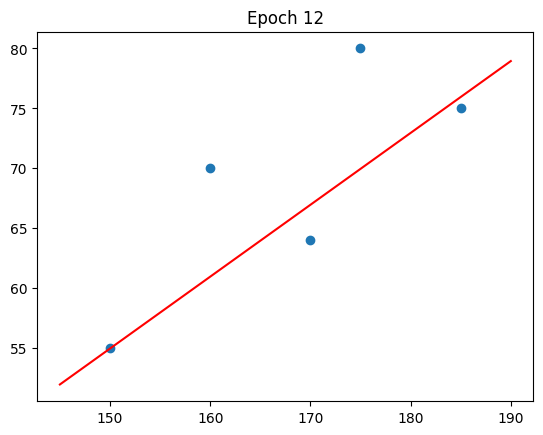

epoch = 13, train_loss : 38.4676


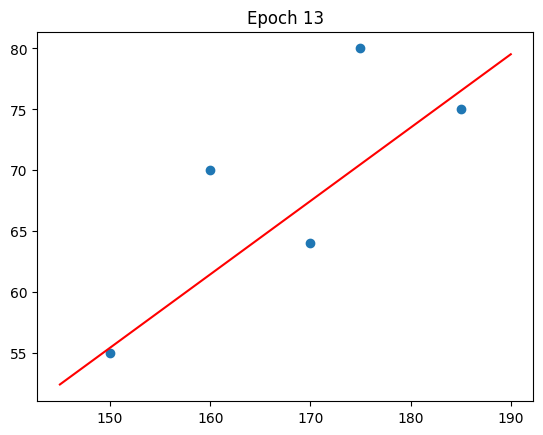

epoch = 14, train_loss : 35.6504


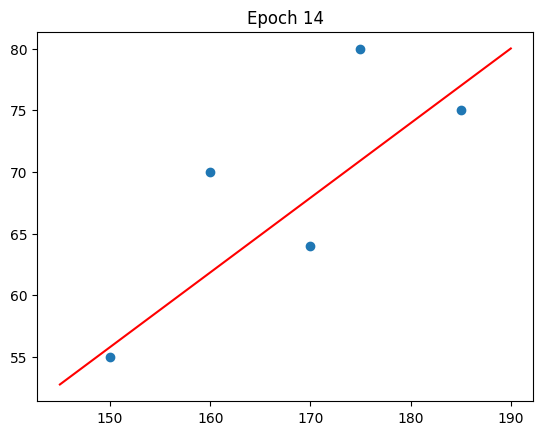

epoch = 15, train_loss : 33.7107


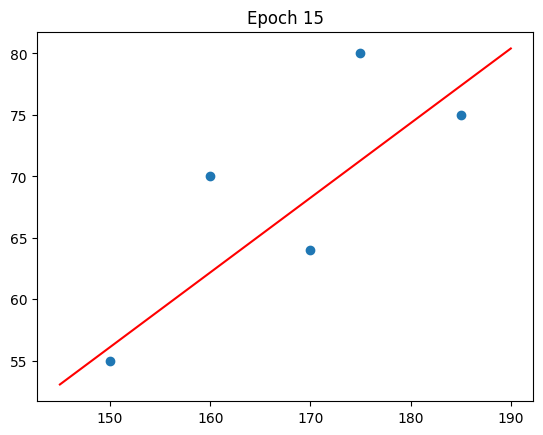

epoch = 16, train_loss : 32.3752


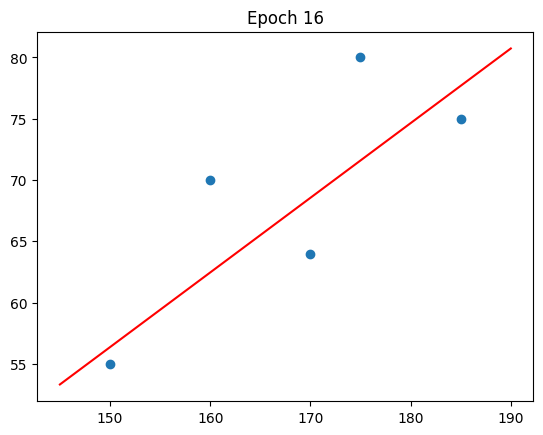

epoch = 17, train_loss : 31.4557


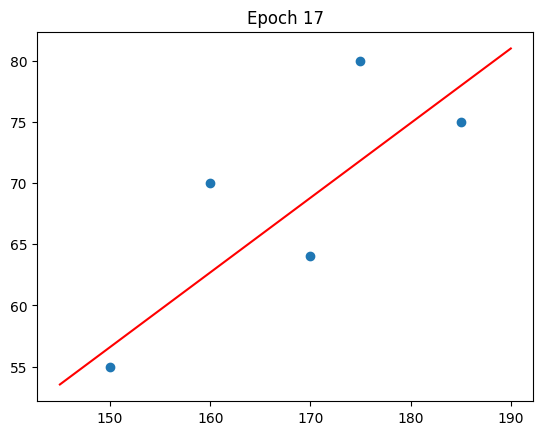

epoch = 18, train_loss : 30.8226


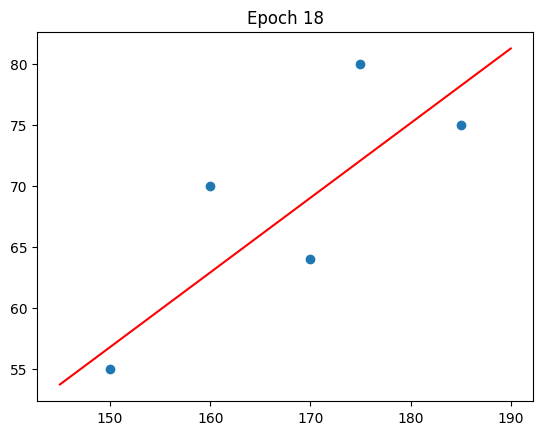

epoch = 19, train_loss : 30.3866


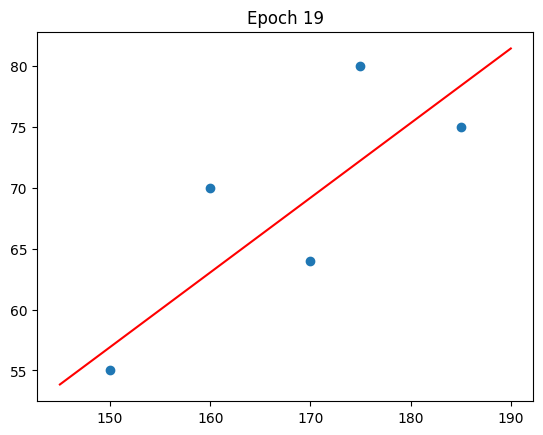

epoch = 20, train_loss : 30.0865


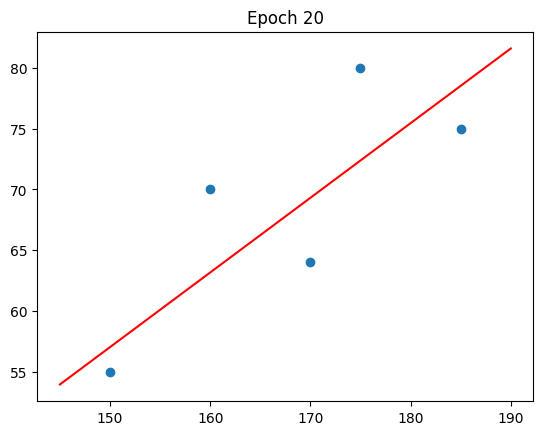

In [62]:
# 모델 파라미터 초기화
a = torch.tensor([0.45],requires_grad=True)
b = torch.tensor([-35.],requires_grad=True)
# 하이퍼파라미터 설정
LR = 3e-6
EPOCH = 20
loss_history = []

for ep in range(EPOCH):
  #inference
  y_hat = a*x+b
  #loss
  loss = 0
  for n in range(N):
    loss += (y[n]-y_hat[n])**2
  loss = loss/N # MSE

  # update
  loss.backward()
  with torch.no_grad():
    a -= LR*a.grad # weight update
    b -= LR*b.grad # weight update
  a.grad = torch.tensor([0.]) # gradient 초기화
  b.grad = torch.tensor([0.]) # gradient 초기화
  loss_history += [loss.item()]
  print(f"epoch = {ep+1}, train_loss : {loss.item():.4f}")
  x_plot = torch.linspace(145,190,100)
  y_plot = a.detach()*x_plot+b.detach()
  plt.figure()
  plt.plot(x,y,'o') # 실제 데이터
  plt.plot(x_plot,y_plot,'r') # 내가 예측한 모델
  plt.title(f"Epoch {ep+1}")
  plt.show()

Text(0.5, 1.0, 'Training Loss')

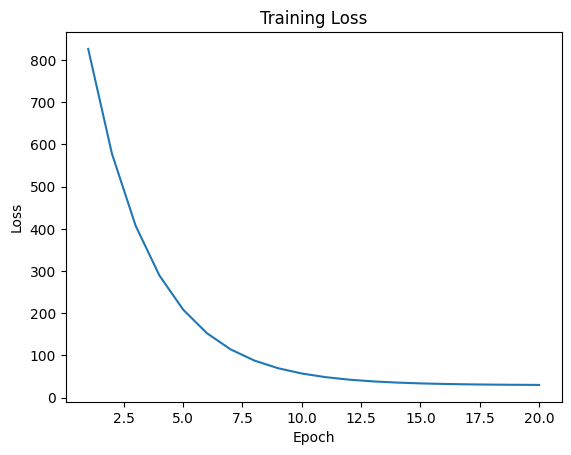

In [63]:
# epoch에 따른 loss
plt.plot(range(1,EPOCH+1),loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")

# pytorch로 모델학습은 이렇게 하는게 국룰

Epoch:1, train_loss:900.5650
Weight: 0.4780, Bias: -34.9998


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


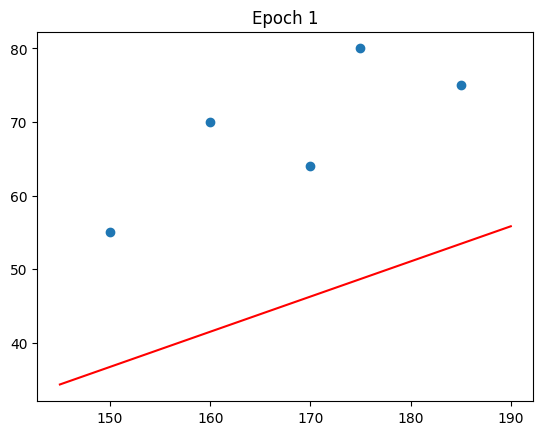

Epoch:2, train_loss:660.9294
Weight: 0.5013, Bias: -34.9997


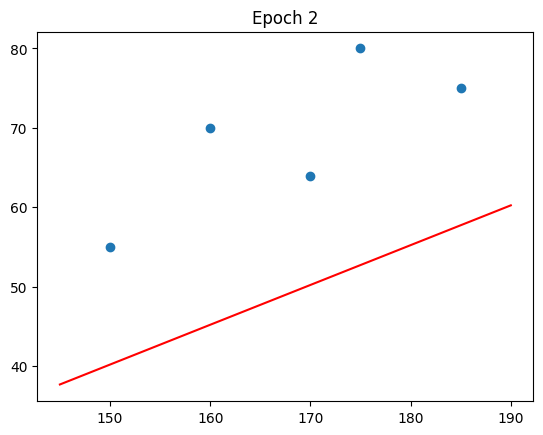

Epoch:3, train_loss:495.9343
Weight: 0.5206, Bias: -34.9996


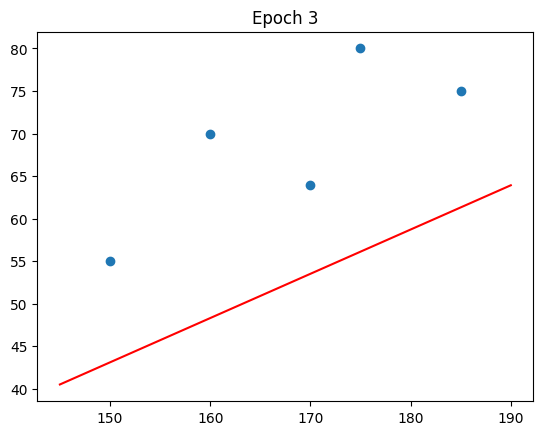

Epoch:4, train_loss:382.3307
Weight: 0.5366, Bias: -34.9995


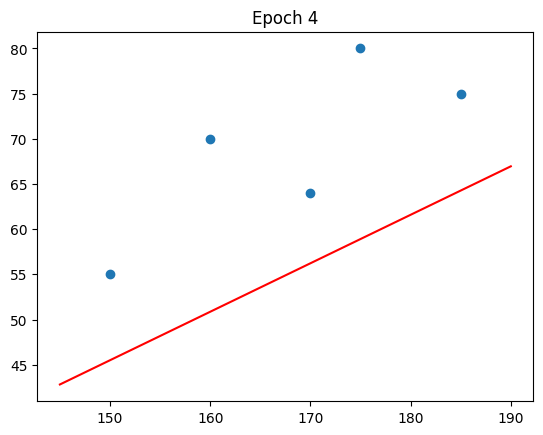

Epoch:5, train_loss:304.1121
Weight: 0.5499, Bias: -34.9994


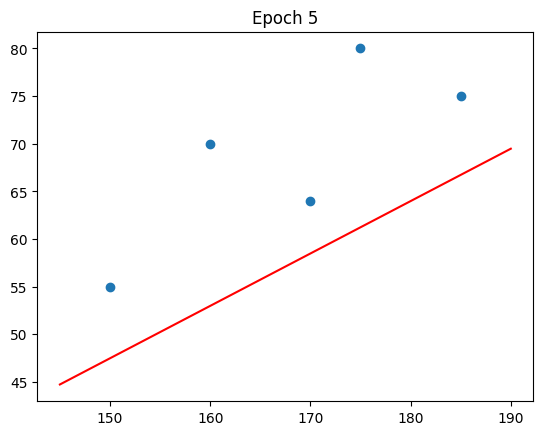

Epoch:6, train_loss:250.2566
Weight: 0.5609, Bias: -34.9993


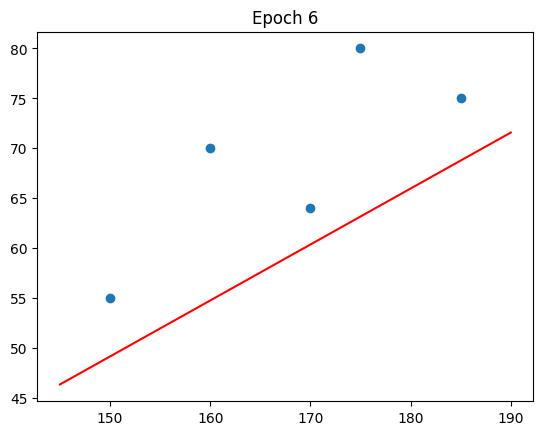

Epoch:7, train_loss:213.1756
Weight: 0.5701, Bias: -34.9993


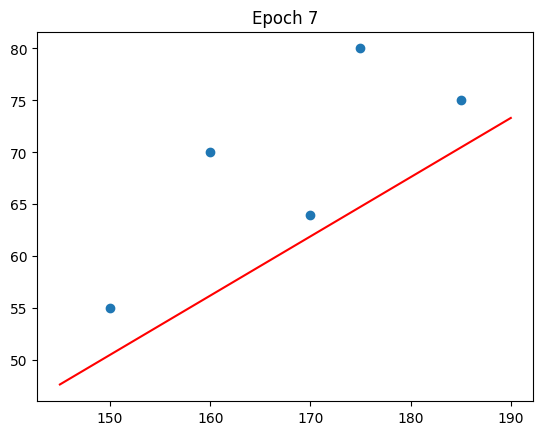

Epoch:8, train_loss:187.6445
Weight: 0.5777, Bias: -34.9992


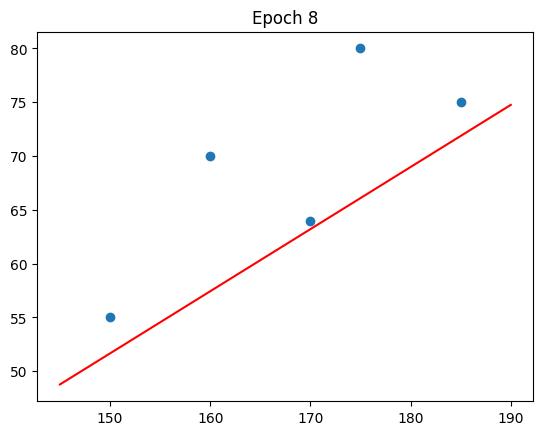

Epoch:9, train_loss:170.0657
Weight: 0.5840, Bias: -34.9992


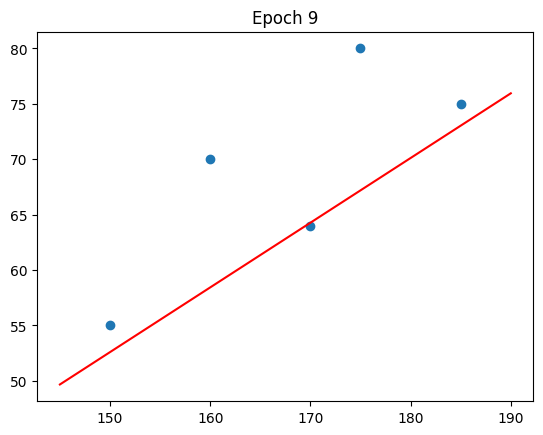

Epoch:10, train_loss:157.9622
Weight: 0.5892, Bias: -34.9991


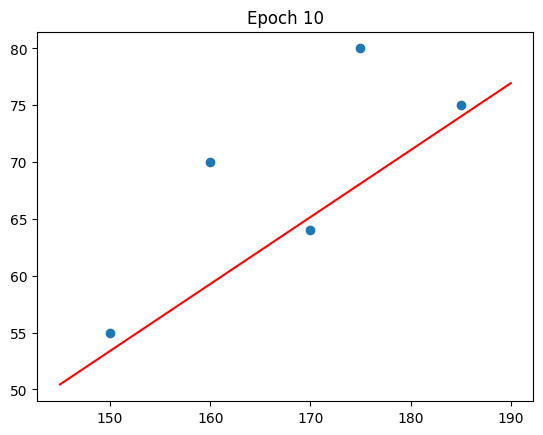

Epoch:11, train_loss:149.6288
Weight: 0.5935, Bias: -34.9991


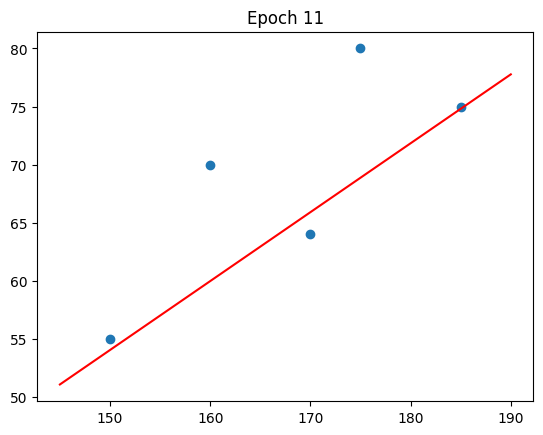

Epoch:12, train_loss:143.8909
Weight: 0.5971, Bias: -34.9991


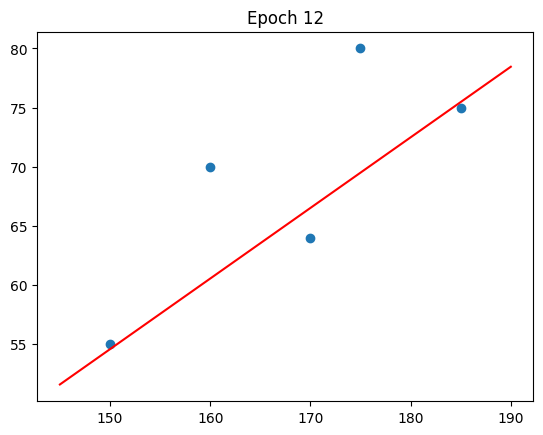

Epoch:13, train_loss:139.9402
Weight: 0.6001, Bias: -34.9991


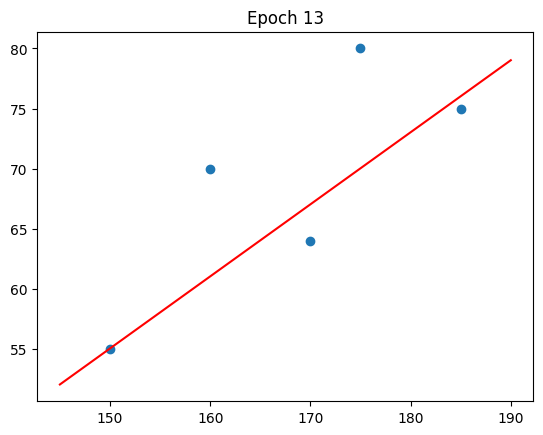

Epoch:14, train_loss:137.2202
Weight: 0.6026, Bias: -34.9991


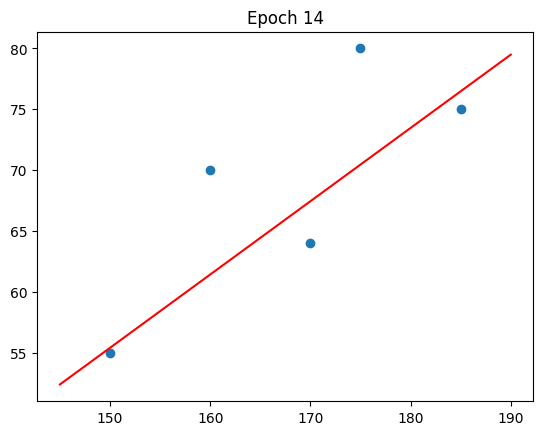

Epoch:15, train_loss:135.3472
Weight: 0.6046, Bias: -34.9990


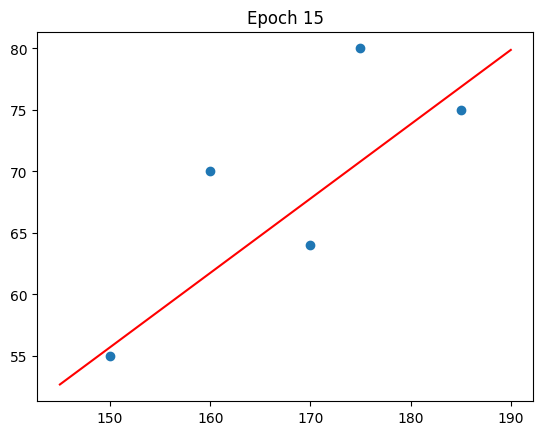

Epoch:16, train_loss:134.0578
Weight: 0.6064, Bias: -34.9990


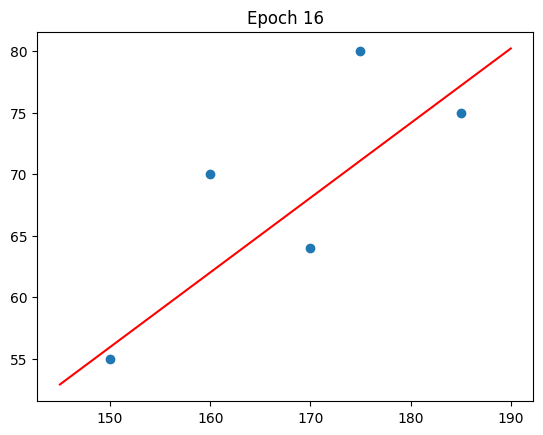

Epoch:17, train_loss:133.1698
Weight: 0.6078, Bias: -34.9990


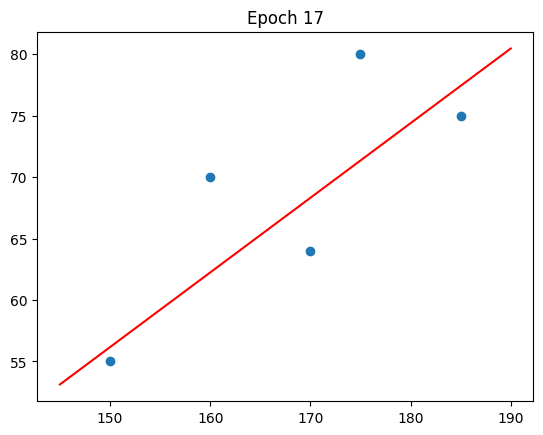

Epoch:18, train_loss:132.5586
Weight: 0.6089, Bias: -34.9990


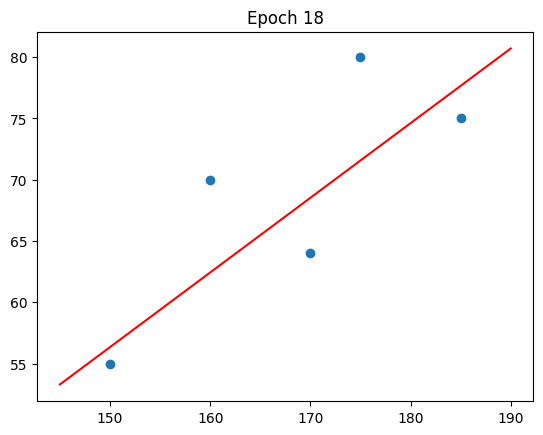

Epoch:19, train_loss:132.1376
Weight: 0.6099, Bias: -34.9990


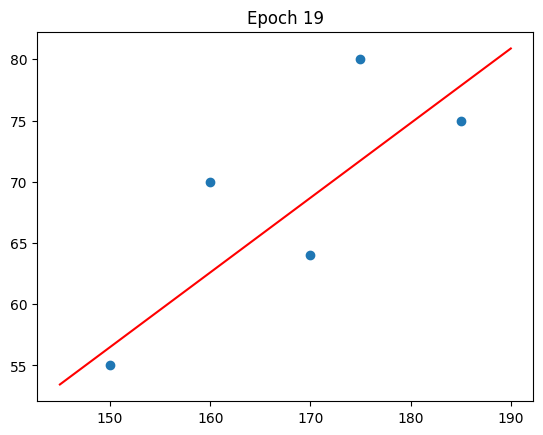

Epoch:20, train_loss:131.8478
Weight: 0.6107, Bias: -34.9990


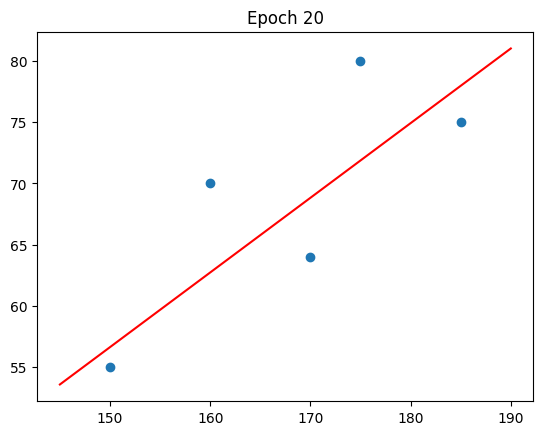

In [65]:
# 보니까 핵심은 4줄이다.

from torch import nn, optim

x=x.reshape(-1,1)

# 모델 설정(선형 회귀로 결정 1개노드-1개노드)
model = nn.Linear(1,1)
model.weight.data = torch.tensor([[0.45]])
model.bias.data = torch.tensor([-35.])

LR = 3e-6
EPOCH = 20
optimizer = optim.SGD(model.parameters(),lr = LR)
criterion = nn.MSELoss()

loss_history=[]

# 학습 시작!
for ep in range(EPOCH):
  # inference
  y_hat = model(x)
  # loss
  loss = criterion(y_hat,y)
  # update
  optimizer.zero_grad() # gradient 누적을 막기위한 초기화
  loss.backward() # backpropagation
  optimizer.step() # weight update
  # print loss
  loss_history += [loss.item()]
  print(f"Epoch:{ep+1}, train_loss:{loss.item():.4f}")
  # print weight and bias
  print(f"Weight: {model.weight.data.item():.4f}, Bias: {model.bias.data.item():.4f}")
  # plot graph
  x_plot = torch.linspace(145,190,100)
  y_plot = model.weight.squeeze().detach()*x_plot+model.bias.detach()
  plt.figure()
  plt.plot(x,y,'o') # 실제 데이터
  plt.plot(x_plot,y_plot,'r') # 내가 예측한 모델
  plt.title(f"Epoch {ep+1}")
  plt.show()